In [1]:
# import pandas as pd
# import numpy as np
# import math
# from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.stattools import grangercausalitytests
# import matplotlib.pyplot as plt
# from scipy.optimize import curve_fit
# import statistics
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split

# file_name = '/content/drive/My Drive/Subjects/'
# file_name1 = '/content/drive/My Drive/Subjects/Ambient/Ambient/'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### reading datasets

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [60]:
k=58
HR = pd.read_csv(file_name + str(k) + '/HR.csv',header = None)
EDA = pd.read_csv(file_name + str(k) + '/EDA_v1.csv', header = None)
TEMP = pd.read_csv(file_name + str(k) + '/TEMP.csv', header = None)
BVP = pd.read_csv(file_name + str(k) + '/BVP.csv', header = None)
Ambient = pd.read_csv(file_name1 + str(k) + '_Env_1.txt',sep = ' ',header = None)
#TV = pd.read_csv(file_name + str(i) + '/Copy of ' + str(i) + '_votes.gsheet')

### adjusting first two rows and getting first time and frequency

In [5]:
HR_starttime = int(HR.iloc[0])
HR_fq = HR.iloc[1]
HR = HR.drop([0,1])
HR = HR.rename(columns = {0 : "HR"})

In [6]:
EDA_starttime = int(TEMP.iloc[0])
EDA_fq = 4
EDA = EDA.rename(columns = {0 : "EDA"})

In [7]:
TEMP_starttime = int(TEMP.iloc[0])
TEMP_fq = TEMP.iloc[1]
TEMP = TEMP.drop([0,1])
TEMP = TEMP.rename(columns = {0 : "TEMP"})

In [61]:
BVP_starttime = int(BVP.iloc[0])
BVP_fq = BVP.iloc[1]
BVP = BVP.drop([0,1])
BVP = BVP.rename(columns = {0 : "BVP"})

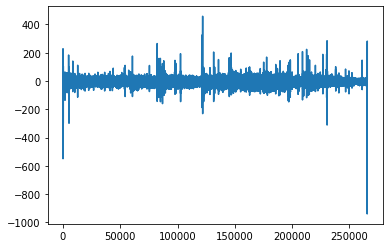

In [62]:
BVP["BVP"].plot()

array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
        0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,
        0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48, -0.5 , -0.48,
       -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34, -0.32, -0.3 ,
       -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16, -0.14, -0.12,
       -0.1 , -0.08, -0.06, -0.04, -0.02])

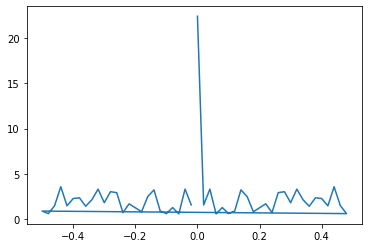

In [102]:
import numpy.fft as fft
signal = np.random.rand(50)
spectrum = fft.fft(signal)
freq = fft.fftfreq(len(spectrum))
plt.plot(freq, abs(spectrum))
freq

In [101]:
freq

array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
        0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,
        0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48, -0.5 , -0.48,
       -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34, -0.32, -0.3 ,
       -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16, -0.14, -0.12,
       -0.1 , -0.08, -0.06, -0.04, -0.02])

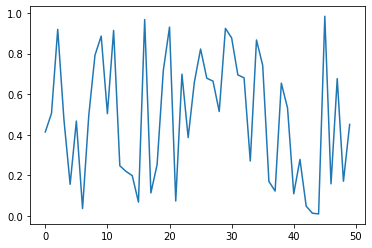

In [98]:
plt.plot(signal)

### removing the difference at the beggining of timeseries

In [ ]:
MAX = max(HR_starttime,EDA_starttime,BVP_starttime,TEMP_starttime)
HR_dif = MAX - HR_starttime
EDA_dif = MAX - EDA_starttime
BVP_dif = MAX - BVP_starttime
TEMP_dif = MAX - TEMP_starttime

In [ ]:
if HR_dif > 0:
    HR = HR.drop(range(2,int(HR_dif*HR_fq)))
if EDA_dif > 0:
    EDA = EDA.drop(range(2,int(EDA_dif*EDA_fq)))
if BVP_dif > 0 :
    BVP = BVP.drop(range(2,int(BVP_dif * BVP_fq)))
if TEMP_dif > 0 :
    TEMP = TEMP.drop(range(2,int(TEMP_dif*TEMP_fq)))

### first 180 second of each time series

In [ ]:
EDA = EDA.reset_index()
EDA = EDA.drop(range(0,int(180 * EDA_fq)))
EDA = pd.DataFrame(EDA)
EDA = EDA.drop(columns = "index")

HR = HR.reset_index()
HR = HR.drop(range(0,int(180 * HR_fq)))
HR = pd.DataFrame(HR)
HR = HR.drop(columns = "index")

TEMP = TEMP.reset_index()
TEMP = TEMP.drop(range(0,int(180 * TEMP_fq)))
TEMP = pd.DataFrame(TEMP)
TEMP= TEMP.drop(columns = "index")

#### Ambient cleaning and preparing

In [ ]:
Ambient.columns = ("Day","Hour","Humidity","Ambient_Temp","unknown")
Ambient['Hour']  = pd.to_datetime(Ambient['Hour'])
Ambient['time'] = Ambient['Hour'] - Ambient.iloc[0,1]
Ambient['time'] = Ambient['time'].dt.total_seconds().astype(int)
Ambient = Ambient.dropna()
Ambient = Ambient.reset_index()
Ambient = Ambient.drop(columns = ["unknown","index","Day","Hour","Humidity"])
Ambient = Ambient.drop(Ambient["time"][Ambient["time"] < 90].index)
Ambient = Ambient.reset_index()
Ambient = Ambient.drop(columns = ["index"])

In [ ]:
#Upper_head = min(Ambient.shape[0]*2,HR.shape[0]) - 50
#for thermal vote:
Upper_head = Ambient["time"][Ambient["Ambient_Temp"] == Ambient["Ambient_Temp"].max()].max()

### reseting indices and change datasets to be in same sizes for 50 mins

In [ ]:
Ambient = Ambient.drop(range(math.floor(Upper_head/2),Ambient.shape[0]))
Ambient = Ambient.reset_index()
Ambient = Ambient.drop(columns = ["index"])

In [ ]:
EDA = EDA.reset_index()
EDA = EDA.drop(range(int(Upper_head*EDA_fq),EDA.shape[0]))
EDA = pd.DataFrame(EDA)
EDA = EDA.drop(columns = "index")

HR = HR.reset_index()
HR = HR.drop(range(int(Upper_head*HR_fq),HR.shape[0]))
HR = pd.DataFrame(HR)
HR = HR.drop(columns = "index")

TEMP = TEMP.reset_index()
TEMP = TEMP.drop(range(int(Upper_head*TEMP_fq),TEMP.shape[0]))
TEMP = pd.DataFrame(TEMP)
TEMP = TEMP.drop(columns = "index")

### assigning time to the columns

In [ ]:
HR['time'] = list(np.arange(0, int(Upper_head * HR_fq),float(1/HR_fq)))
EDA['time'] = list(np.arange(0, int(Upper_head),float(1/EDA_fq)))
TEMP['time'] = list(np.arange(0, int(Upper_head),float(1/TEMP_fq)))

### BVP prepare

In [ ]:
BVP = BVP.reset_index()
BVP = BVP.drop(range(0,int(180 * BVP_fq)))
BVP = pd.DataFrame(BVP)
BVP= BVP.drop(columns = "index")

BVP = BVP.reset_index()
BVP = BVP.drop(range(int(Upper_head*BVP_fq),BVP.shape[0]))
BVP = pd.DataFrame(BVP)
BVP= BVP.drop(columns = "index")

BVP['time'] = list(np.arange(0, int(Upper_head),float(1/64)))

#trend = pd.DataFrame(seasonal_decompose(BVP["BVP"], freq = 60,model = 'additive').trend)
#trend["time"] = BVP["time"]
#trend['BVP'][np.isnan(trend['BVP'])] = BVP['BVP']
#temp = trend.groupby(np.arange(len(trend))//16).mean()
#temp['time'] = list(np.arange(0, int(3900),float(1/4)))
#BVP = temp

### Check variance of BVP and HR

In [ ]:
temp = pd.DataFrame(BVP["BVP"].groupby(np.arange(len(BVP["BVP"]))//1000).std())
time = pd.DataFrame(BVP["time"].groupby(np.arange(len(BVP["time"]))//1000).median().round())
BVP = pd.concat([time,temp],axis = 1)

In [ ]:
# BVP["BVP"].rolling(window=2000).std().plot()
# BVP["BVP"].groupby(np.arange(len(BVP["BVP"]))//2000).std().plot()
# plt.title("BVP for subject #" + str(k))
# plt.savefig("BVP_" + str(k))

### Merging dataframes

In [ ]:
#BVP['BVP'][np.isnan(BVP['BVP'])] = BVP['BVP']
#BVP = BVP.groupby(np.arange(len(BVP["BVP"]))//16).mean()
#BVP['time'] = list(np.arange(0, int(Upper_head),float(1/4)))

In [ ]:
Dataset = EDA.merge(HR,on = "time", how='outer')
Dataset = Dataset.merge(TEMP, on = "time", how = 'outer')
Dataset['HR'] = Dataset['HR'].interpolate()
#Dataset = Dataset.merge(BVP, on = "time", how = 'outer')

In [ ]:
Dataset = Dataset.merge(BVP, on = "time", how = 'outer')
Dataset['BVP'] = Dataset['BVP'].interpolate()

In [ ]:
Ambient['time'] = list(np.arange(0,Upper_head-1,2))

In [ ]:
Dataset = Dataset.merge(Ambient, on = "time", how = 'outer')
Dataset['Ambient_Temp'] = Dataset['Ambient_Temp'].astype(float)
Dataset['Ambient_Temp'] = Dataset['Ambient_Temp'].interpolate()
Dataset = Dataset.dropna()

'''
Dataset = Dataset.merge(TV, on = "time", how = 'outer')
Dataset['Preference'] = Dataset['Preference'].interpolate()
Dataset['Preference'] = round(Dataset['Preference'])
Dataset = Dataset.dropna()'''

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:1097: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


'\nDataset = Dataset.merge(TV, on = "time", how = \'outer\')\nDataset[\'Preference\'] = Dataset[\'Preference\'].interpolate()\nDataset[\'Preference\'] = round(Dataset[\'Preference\'])\nDataset = Dataset.dropna()'

### Random Forest

In [ ]:
k=50

In [ ]:
TV = pd.read_csv(file_name + str(k) + '/' + str(k) + '_votes&ambient.csv')
TV["time"] = TV["Unnamed: 0"]*2
TV = TV.drop(["Time", "Unnamed: 0"],axis=1)
Dataset = Dataset.merge(TV, on = "time", how = 'outer')
Dataset['Thermal Preference'] = Dataset['Thermal Preference'].interpolate()
Dataset["Thermal Preference"][Dataset["Thermal Preference"] > 0] = 1
Dataset["Thermal Preference"][Dataset["Thermal Preference"] < 0] = -1
Dataset = Dataset.dropna()

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:1097: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


In [ ]:
features = Dataset

In [ ]:
X = features.drop(['Thermal Preference','time','TEMP','EDA','Ambient_Temp'], axis = 1)
y = features['Thermal Preference']


#from sklearn.datasets import make_classification
#X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
# result of cross validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(clf, X, y, cv=5)

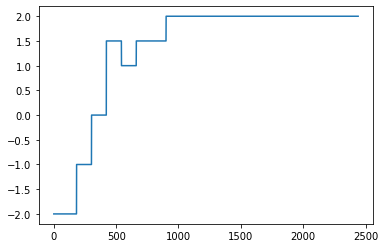

In [ ]:
TV["Thermal Preference"].plot()

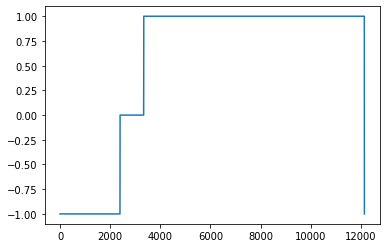

In [ ]:
Dataset["Thermal Preference"].plot()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# y_pred = clf.predict(X)

# print(confusion_matrix(y,y_pred))
# print(classification_report(y,y_pred))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All CV Scores ===")
print(score)
print('\n')
print("=== Mean CV Score ===")
print("Mean CV Score - Random Forest: ", score.mean())

=== Confusion Matrix ===
[[ 373    9   97]
 [  22  109   49]
 [  62   29 1679]]


=== Classification Report ===
              precision    recall  f1-score   support

        -1.0       0.82      0.78      0.80       479
         0.0       0.74      0.61      0.67       180
         1.0       0.92      0.95      0.93      1770

    accuracy                           0.89      2429
   macro avg       0.83      0.78      0.80      2429
weighted avg       0.89      0.89      0.89      2429



=== All CV Scores ===
[0.6167147  0.63441746 0.62371346 0.65541375 0.57578254]


=== Mean CV Score ===
Mean CV Score - Random Forest:  0.6212083806123563


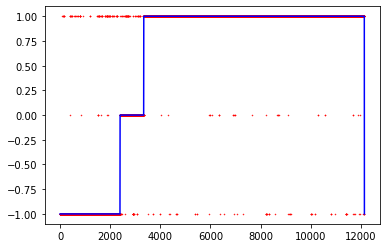

In [ ]:
pred = clf.predict(X)
plt.plot(pred,'.',color = 'red', markersize = 1)
plt.plot(y, color = 'blue')
#plt.xlabel('time')
#plt.ylabel('Thermal Votes')
#plt.legend(['predicted','actual'])
#plt.savefig('55.png')

### Correlation matrix

In [ ]:
Dataset54.drop(columns = ["time"]).corr().to_csv("54.csv")

#### Granger Causality test

In [ ]:
#res = grangercausalitytests(Dataset55[["Ambient_Temp","BVP"]],5)